In [58]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
import seaborn as sns

## Read Input Data

In [59]:
df = pd.read_excel('istanza.xlsx')

In [60]:
df.sort_values('Time',inplace=True)
#df.drop('Eu obj', axis =1, inplace=True)
#df.drop('Mod obj', axis =1, inplace=True)
df.drop('Avg Area', axis =1, inplace=True)

In [61]:
df.head()

,Avg depth,Avg width,Eu obj,Mod obj,Square_index,Time,n_items
78,1.627,1.477,3.66,3.66,10.155721,0.017,3
94,3.413,1.737,10.24,10.24,96.488198,0.024,3
88,2.690,2.027,8.07,8.07,32.708436,0.025,3
76,3.507,1.523,10.52,10.52,130.269206,0.025,3
54,2.353,2.207,7.01,7.01,6.615315,0.027,3


In [62]:
df2 = df[df['Time'] < 300]
#df2.drop('Time', axis =1, inplace=True)

#df2 = df.drop(columns=['Obj heur', 'Obj mod', 'Min Time', 'Max Time', 'Min Area', 'Max Area', 'Min D', 'Max D', 'Min W', 'Max W'])

In [63]:
df2.head()

,Avg depth,Avg width,Eu obj,Mod obj,Square_index,Time,n_items
78,1.627,1.477,3.66,3.66,10.155721,0.017,3
94,3.413,1.737,10.24,10.24,96.488198,0.024,3
88,2.690,2.027,8.07,8.07,32.708436,0.025,3
76,3.507,1.523,10.52,10.52,130.269206,0.025,3
54,2.353,2.207,7.01,7.01,6.615315,0.027,3


## Correlation

In [64]:
df2.corr()

,Avg depth,Avg width,Eu obj,Mod obj,Square_index,Time,n_items
Avg depth,1.000000,0.077801,0.639591,0.630927,0.697683,-0.105178,0.037004
Avg width,0.077801,1.000000,0.368155,0.412302,-0.538998,0.019206,-0.090264
Eu obj,0.639591,0.368155,1.000000,0.988799,0.228761,0.167072,0.620046
Mod obj,0.630927,0.412302,0.988799,1.000000,0.186760,0.137117,0.582515
Square_index,0.697683,-0.538998,0.228761,0.186760,1.000000,-0.128037,0.058525
Time,-0.105178,0.019206,0.167072,0.137117,-0.128037,1.000000,0.456629
n_items,0.037004,-0.090264,0.620046,0.582515,0.058525,0.456629,1.000000


Plot of correlation

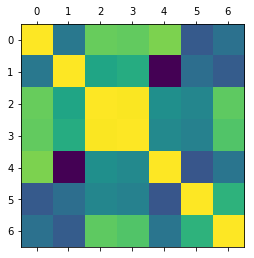

In [65]:
plt.matshow(df2.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60ff12dfd0>,
      dtype=object)

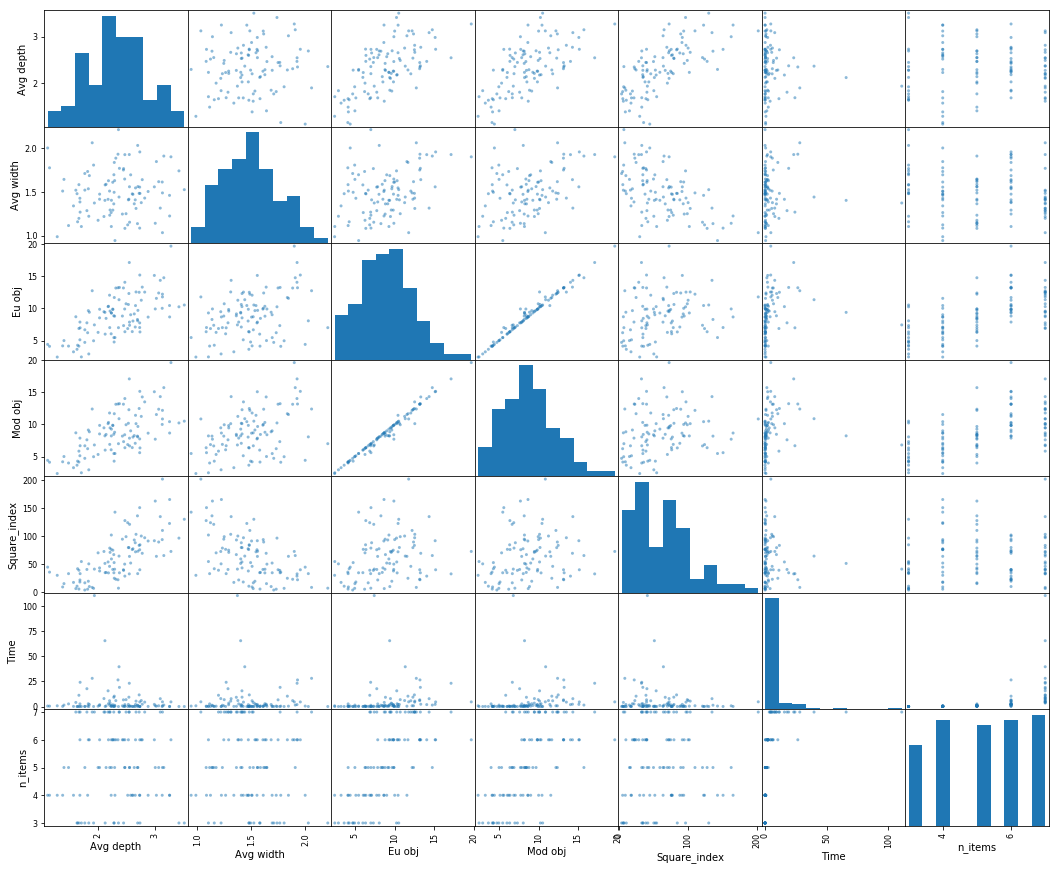

In [66]:
pd.plotting.scatter_matrix(df2, figsize=(18,15))

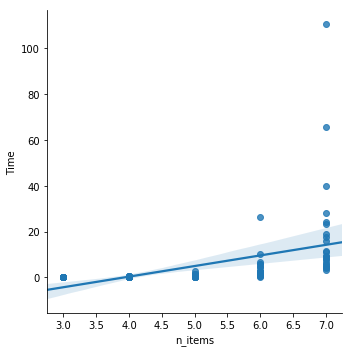

In [67]:
sns.lmplot(x='n_items',y='Time',data=pd.DataFrame({'n_items':  df2.n_items, 'Time': df2.Time}),fit_reg=True) 

## Analyze data information

In [68]:
df2.reset_index(inplace=True,drop=True)

In [69]:
df3 = df2

## Rescale data

In [70]:
scaler = StandardScaler()

In [71]:
df3 = pd.DataFrame(data = scaler.fit_transform(df3))

Rescaled data

In [72]:
df3.head()

,0,1,2,3,4,5,6
0,-1.337784,-0.054752,-1.579565,-1.502201,-1.273785,-0.388999,-1.527752
1,2.073283,0.931766,0.396167,0.438711,0.817622,-0.388502,-1.527752
2,0.692431,2.032113,-0.255404,-0.201377,-0.727445,-0.388431,-1.527752
3,2.252813,0.119786,0.480241,0.521303,1.635967,-0.388431,-1.527752
4,0.048798,2.715087,-0.573683,-0.514047,-1.359551,-0.388289,-1.527752


## PCA

In [73]:
pca = PCA()

In [74]:
principalDf = pd.DataFrame(data = pca.fit_transform(df3), columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7'])

In [75]:
cumul_expl_var_ratio = pca.explained_variance_ratio_.cumsum()

In [76]:
cumul_expl_var_ratio

array([0.43937837, 0.69684588, 0.8930394 , 0.97831861, 0.99150545,
       0.99875917, 1.        ])

In [77]:
pca.explained_variance_ratio_

array([0.43937837, 0.25746751, 0.19619352, 0.08527921, 0.01318684,
       0.00725373, 0.00124083])

Data in the new system

In [78]:
principalDf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,-3.138781,0.570460,-0.576154,0.148613,-0.330390,0.106390,0.016903
1,1.051756,-1.286088,-1.995397,1.368808,-0.113637,-0.202878,0.006404
2,-0.399288,0.679586,-2.402013,1.088150,0.218670,-0.325033,0.018519
3,1.268193,-2.270817,-1.469391,1.337294,-0.188968,0.071138,-0.005845
4,-1.046619,1.617507,-2.671309,1.013461,0.535203,-0.373070,0.015774


New orthogonal system vectors

In [79]:
pca.components_

array([[ 0.41667026,  0.15427298,  0.55800816,  0.55053363,  0.21324324,
         0.12671722,  0.35580251],
       [-0.39756005,  0.48419692,  0.09112262,  0.11028268, -0.65619022,
         0.33019828,  0.21775501],
       [-0.24306827, -0.56466288, -0.06705991, -0.11516698,  0.15428611,
         0.55397385,  0.52308885],
       [ 0.35012229,  0.23376982, -0.1254506 , -0.13178857,  0.14275656,
         0.74564739, -0.46183386],
       [-0.22762933,  0.60245953, -0.16998399, -0.26817226,  0.60019196,
        -0.05756369,  0.34766725],
       [-0.65917748, -0.0695731 ,  0.29409411,  0.36513277,  0.34334662,
         0.09287571, -0.46294552],
       [-0.01827667, -0.02151244,  0.73803982, -0.66998544, -0.04050673,
        -0.00976306, -0.06232013]])

In [80]:
df_compressed = principalDf.drop(columns=['pc4'])
#df_compressed = pd.concat([df_compressed, df2['Time']],axis=1)

In [81]:
df_compressed.head()

,pc1,pc2,pc3,pc5,pc6,pc7
0,-3.138781,0.570460,-0.576154,-0.330390,0.106390,0.016903
1,1.051756,-1.286088,-1.995397,-0.113637,-0.202878,0.006404
2,-0.399288,0.679586,-2.402013,0.218670,-0.325033,0.018519
3,1.268193,-2.270817,-1.469391,-0.188968,0.071138,-0.005845
4,-1.046619,1.617507,-2.671309,0.535203,-0.373070,0.015774


In [82]:
df_compressed.corr()

,pc1,pc2,pc3,pc5,pc6,pc7
pc1,1.000000e+00,-1.112868e-16,-2.474093e-16,1.728118e-16,1.325682e-16,-4.139251e-17
pc2,-1.112868e-16,1.000000e+00,2.258180e-16,1.292928e-16,3.853538e-16,1.042637e-16
pc3,-2.474093e-16,2.258180e-16,1.000000e+00,-1.216086e-16,-2.228256e-16,-1.118167e-16
pc5,1.728118e-16,1.292928e-16,-1.216086e-16,1.000000e+00,-7.018771e-17,-6.800317e-17
pc6,1.325682e-16,3.853538e-16,-2.228256e-16,-7.018771e-17,1.000000e+00,1.040798e-16
pc7,-4.139251e-17,1.042637e-16,-1.118167e-16,-6.800317e-17,1.040798e-16,1.000000e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60fe369850>,
      dtype=object)

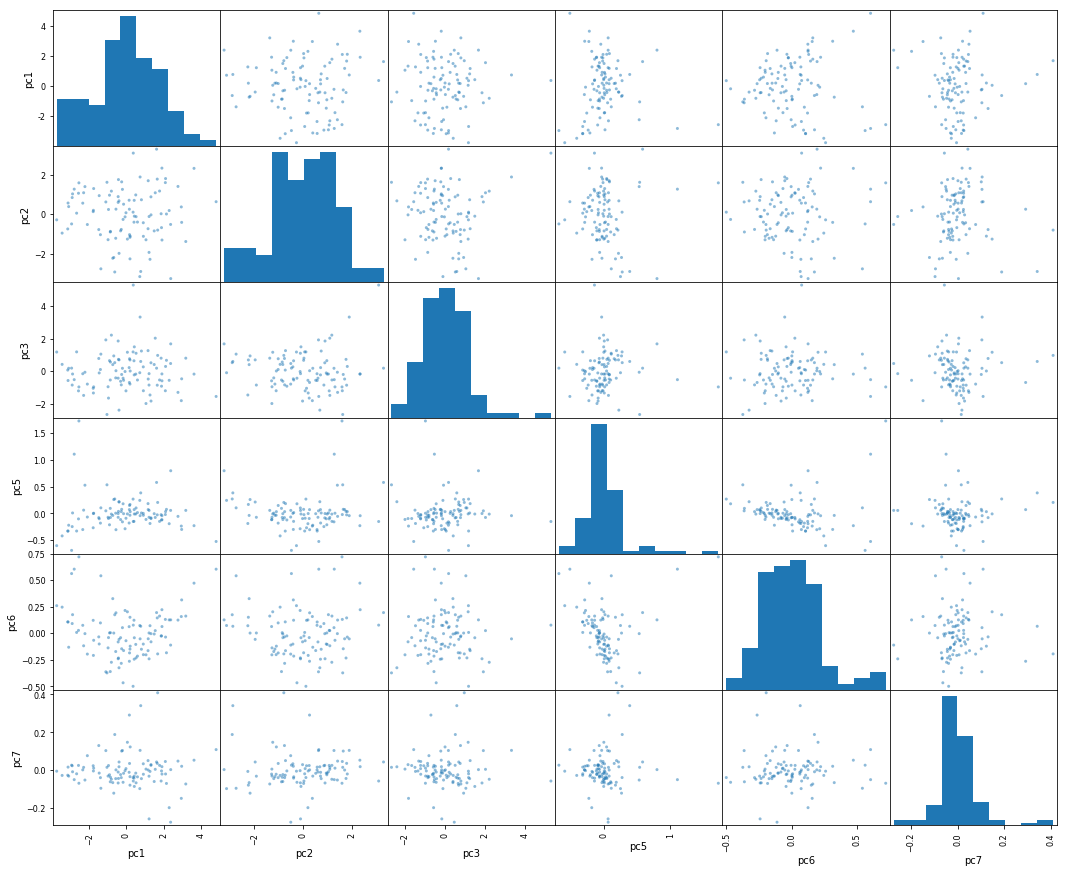

In [83]:
pd.plotting.scatter_matrix(df_compressed, figsize=(18,15))

## Linear Regression

In [84]:
regressor = LinearRegression()

In [85]:
X = df_compressed.copy()
    y = X.pop('Time')

KeyError: 'Time'

In [ ]:
regressor.fit(X,y)